In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
df = pd.read_csv('C:/Users/LENOVO/Downloads/insurance.csv')
print("-" * 100)

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("-" * 100)

# Display the first few rows of the dataset
print(df.head())
print("-" * 100)

# Summary statistics
print(df.describe())
print("-" * 100)

# Check for missing values
print(df.isnull().sum())
print("-" * 100)

# Exploratory Data Analysis (EDA)



----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
----------------------------------------------------------------------------------------------------
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000

In [32]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


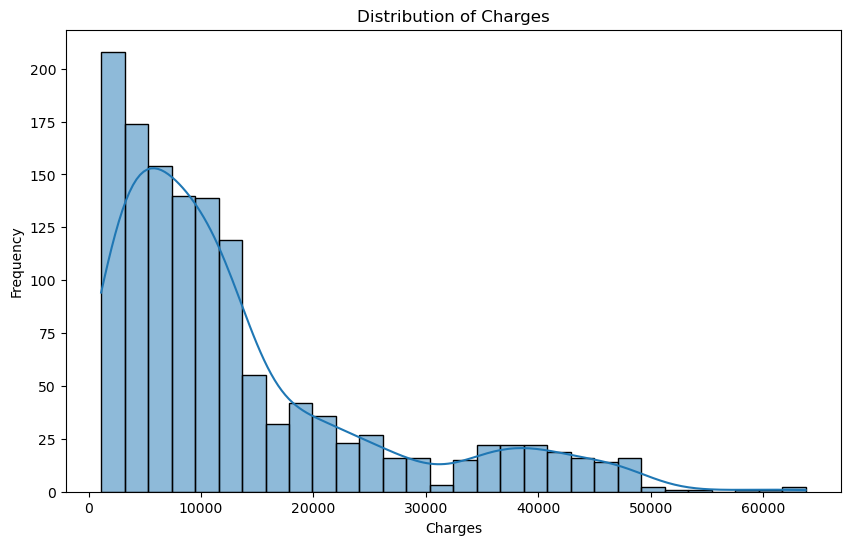

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


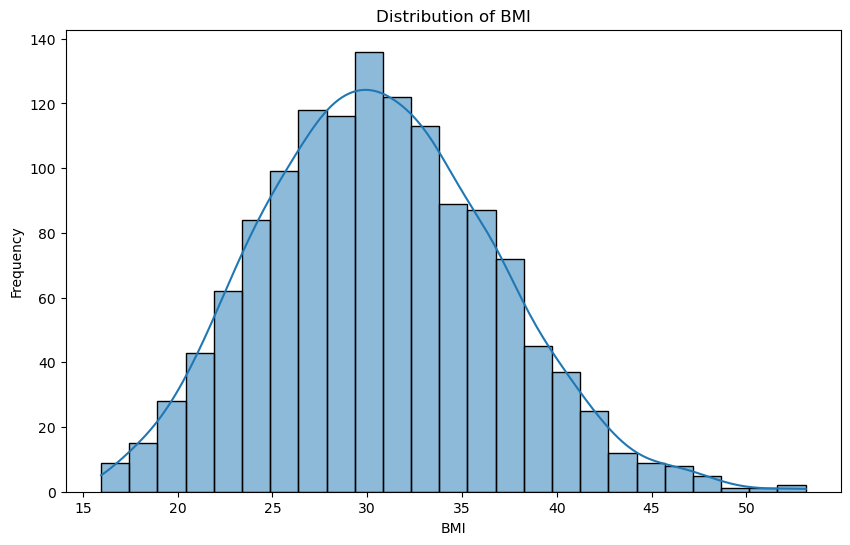

In [35]:
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

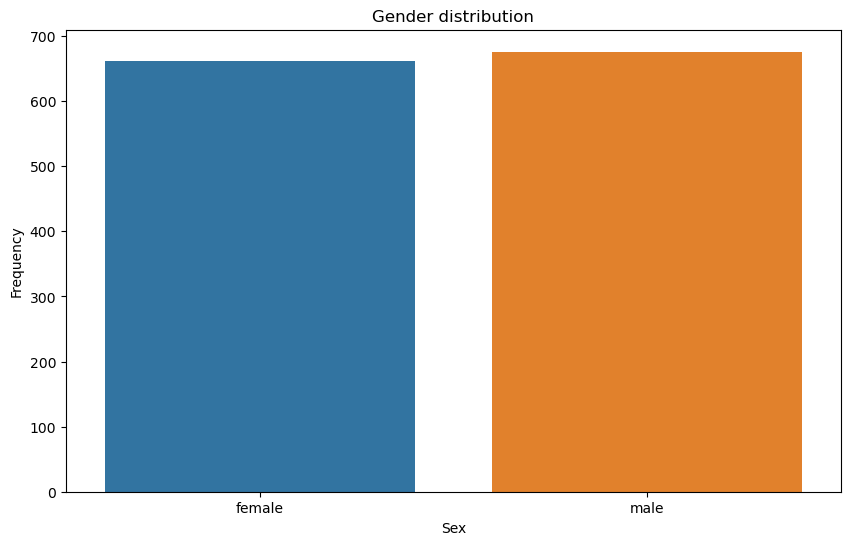

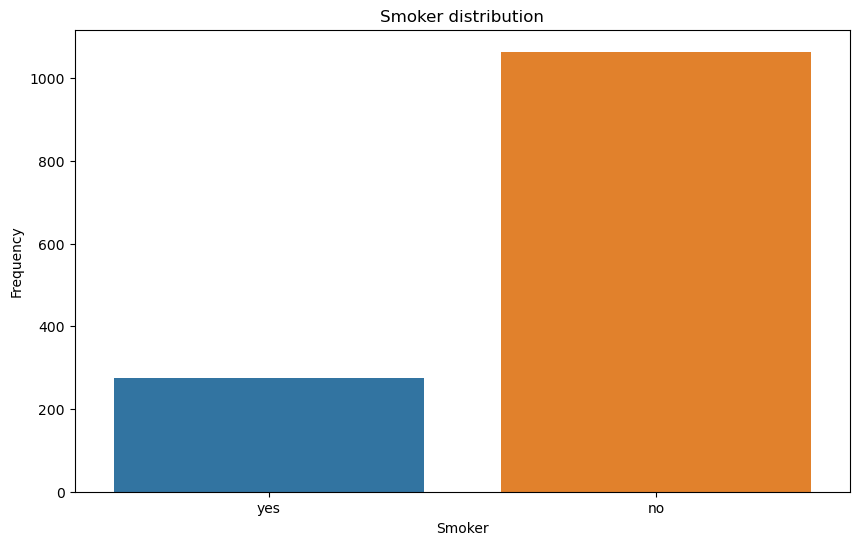

"\nplt.figure(figsize=(10, 6))\nsns.countplot(x='region', data=df)\nplt.title('Count of Regions')\nplt.show()\n"

In [36]:
# Count plot for categorical features
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Gender distribution')
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker distribution')
plt.xlabel("Smoker")
plt.ylabel("Frequency")
plt.show()
"""
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df)
plt.title('Count of Regions')
plt.show()
"""

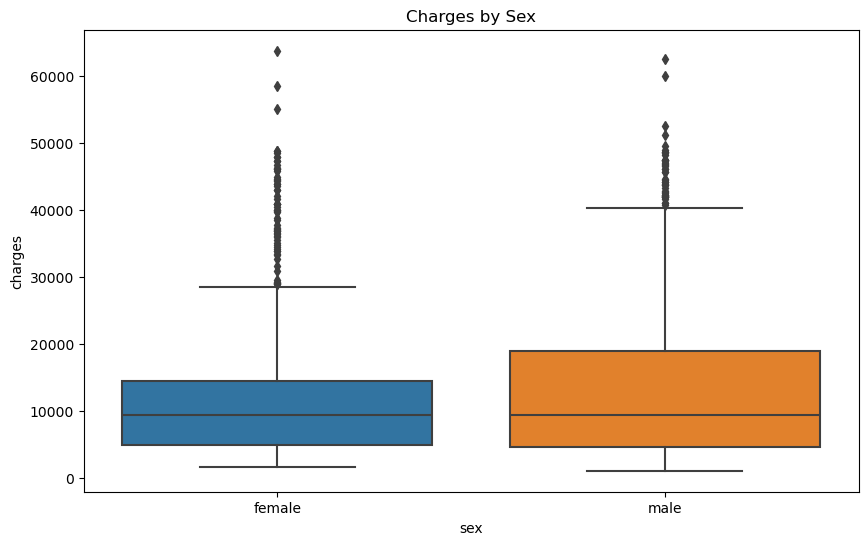

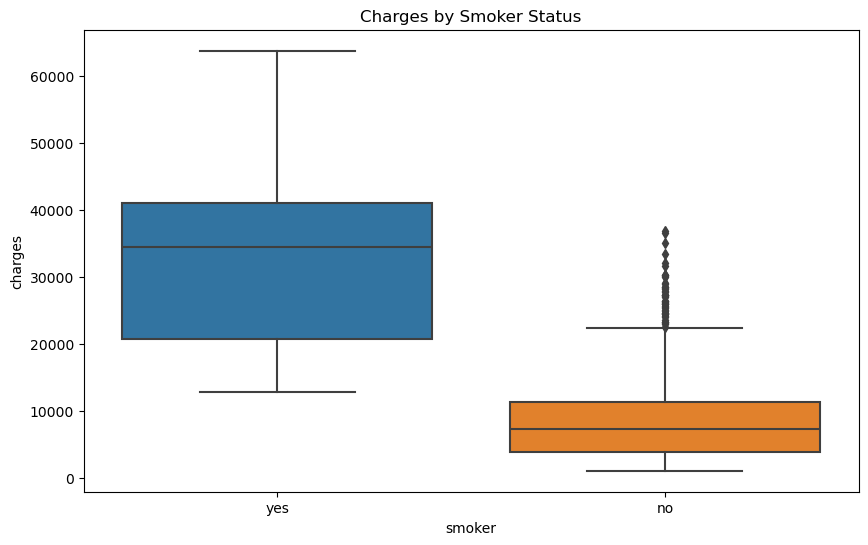

"\nplt.figure(figsize=(10, 6))\nsns.boxplot(x='region', y='charges', data=df)\nplt.title('Charges by Region')\nplt.show()\n"

In [7]:
# Box plots to analyze relationships between categorical features and charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()
"""
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()
"""

- gender doesn't make a big difference in healthcare charges, but being a smoker does – smokers tend to have much higher healthcare costs than non-smokers.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

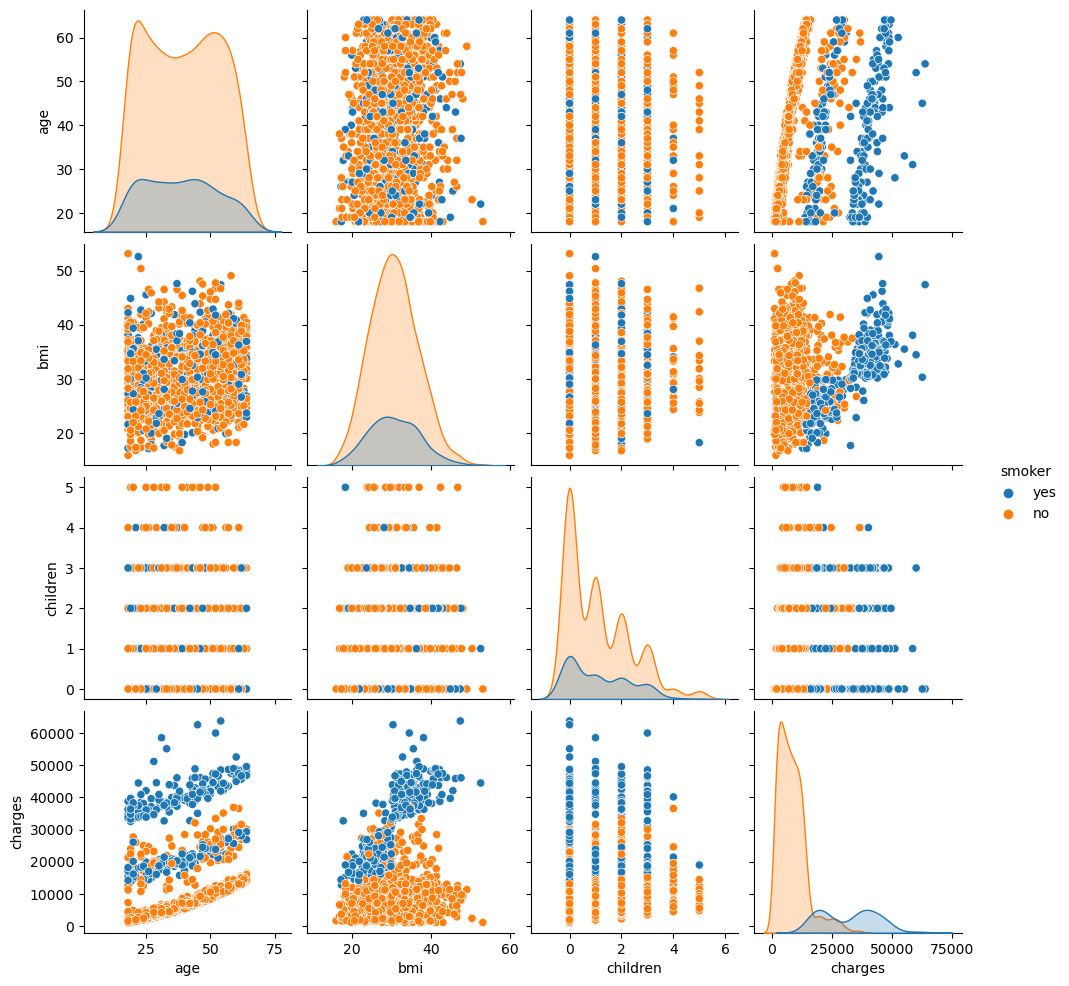

In [8]:
# Pairplot to see relationships between numerical features
sns.pairplot(df, hue='smoker')
plt.show()

- Charges tend to increase with age (especially for smokers). Smokers generally have higher charges at all age levels compared to non-smokers.
- Higher BMI is associated with higher charges, especially for smokers.
- Smokers tend to have higher charges across most features compared to non-smokers.rges and other attributes.rges and other attributes.

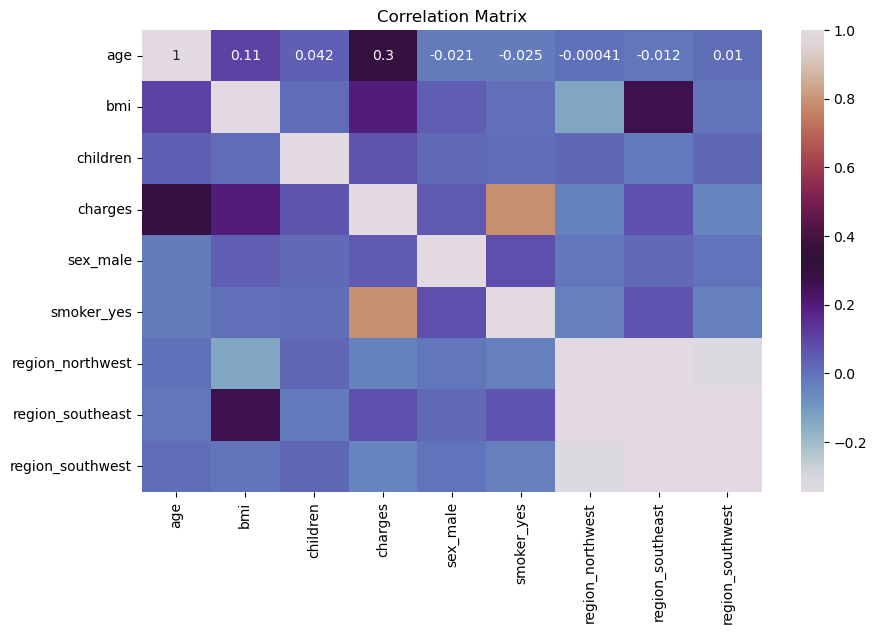

In [25]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='twilight')
plt.title('Correlation Matrix')
plt.show()

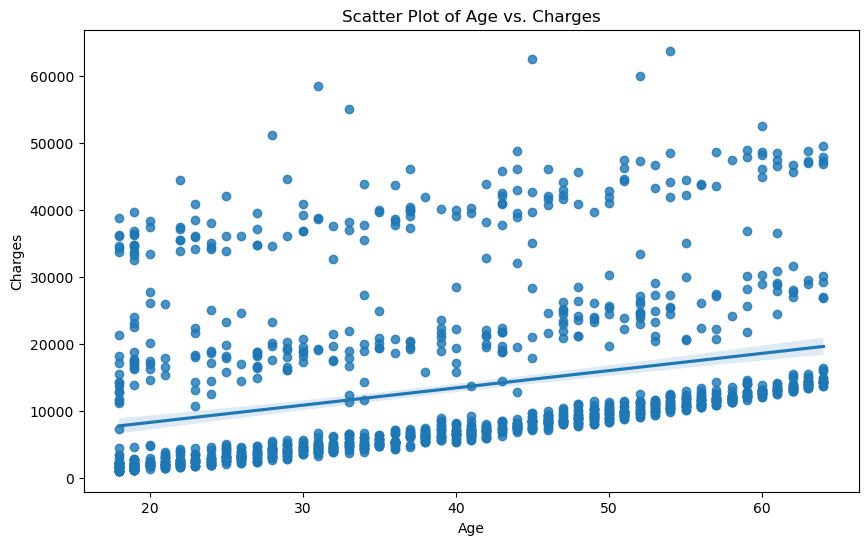

In [30]:
# Scatter plot of Age vs. Charges
plt.figure(figsize=(10, 6))
sns.regplot(x='age', y='charges', data=df)
plt.title('Scatter Plot of Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

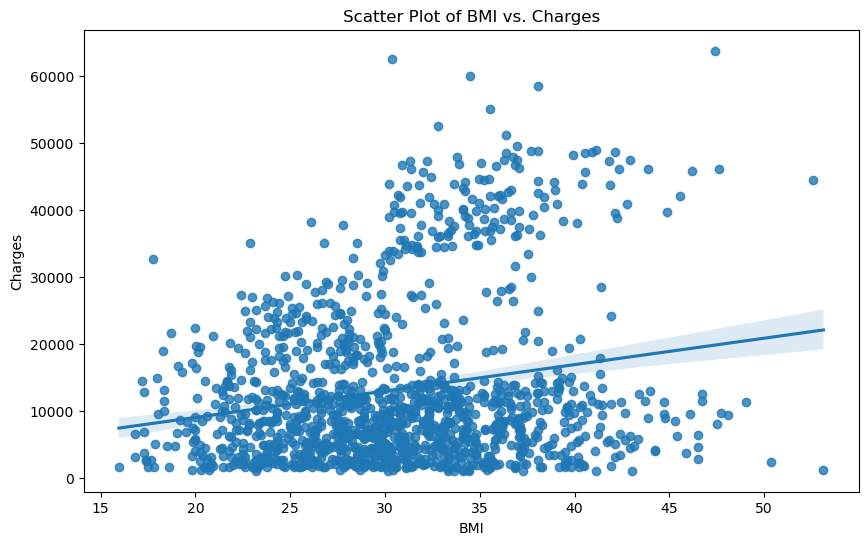

In [29]:
# Scatter plot of BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='charges', data=df)
plt.title('Scatter Plot of BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [12]:
# Correlation coefficients between all features and charges
correlation_matrix = df_encoded.corr()
charges_correlation = correlation_matrix['charges'].sort_values(ascending=False)
print('Correlation coefficients with respect to charges:')
print(charges_correlation)

# Statistical Tests

# T-test to compare charges between smokers and non-smokers
smokers = df[df['smoker'] == 'yes']['charges']
non_smokers = df[df['smoker'] == 'no']['charges']
t_stat, p_value = stats.ttest_ind(smokers, non_smokers)
print(f'T-test results: t-statistic = {t_stat}, p-value = {p_value}')
"""
# ANOVA to compare charges across different regions
anova_result = stats.f_oneway(df[df['region'] == 'northeast']['charges'],
                              df[df['region'] == 'northwest']['charges'],
                              df[df['region'] == 'southeast']['charges'],
                              df[df['region'] == 'southwest']['charges'])
print(f'ANOVA results: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')
"""
# Correlation between age, bmi, and charges
age_charges_corr = df['age'].corr(df['charges'])
bmi_charges_corr = df['bmi'].corr(df['charges'])
print(f'Correlation between age and charges: {age_charges_corr}')
print(f'Correlation between BMI and charges: {bmi_charges_corr}')

Correlation coefficients with respect to charges:
charges             1.000000
smoker_yes          0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex_male            0.057292
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64
T-test results: t-statistic = 46.66492117272371, p-value = 8.271435842179102e-283
Correlation between age and charges: 0.2990081933306476
Correlation between BMI and charges: 0.19834096883362884


- Smoking has strong positive correlation (0.787) with charges i.e., smokers tend to have significantly higher insurance costs.
- Age has a moderate positive correlation (0.299) with charges so, some increase in costs with age.
- BMI has a weak positive correlation (0.198) with charges thus, slight association between higher BMI and higher costs.
- Region, children and sex have very weak correlations with charges and has minimal influence on insurance costs.
- T-test: smoking status has a substantial impact on insurance charges.

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


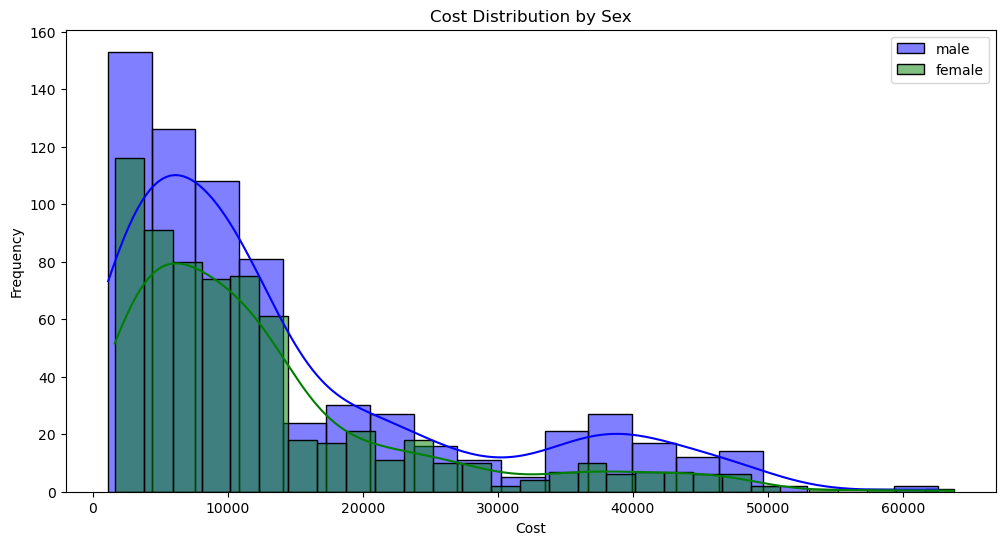

Shapiro-Wilk Test for Male: Statistics=0.823, p=0.000
Shapiro-Wilk Test for Female: Statistics=0.805, p=0.000
Levene Test for Homogeneity of Variance: Statistics=9.909, p=0.002


In [15]:
# Check the distribution of Cost by Gender
plt.figure(figsize=(12, 6))
sns.histplot(df[df['sex'] == 'male']['charges'], kde=True, color='blue', label='male')
sns.histplot(df[df['sex'] == 'female']['charges'], kde=True, color='green', label='female')
plt.title('Cost Distribution by Sex')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Check for normality using Shapiro-Wilk test
male_stat, male_p = stats.shapiro(df[df['sex'] == 'male']['charges'])
female_stat, female_p = stats.shapiro(df[df['sex'] == 'female']['charges'])
print('Shapiro-Wilk Test for Male: Statistics=%.3f, p=%.3f' % (male_stat, male_p))
print('Shapiro-Wilk Test for Female: Statistics=%.3f, p=%.3f' % (female_stat, female_p))

# Check for homogeneity of variance using Levene's test
levene_stat, levene_p = stats.levene(df[df['sex'] == 'male']['charges'],
                                     df[df['sex'] == 'female']['charges'])
print('Levene Test for Homogeneity of Variance: Statistics=%.3f, p=%.3f' % (levene_stat, levene_p))

In [16]:
kruskal_result = stats.kruskal(df[df['sex'] == 'male']['charges'], 
                               df[df['sex'] == 'female']['charges'])
print(f"Kruskal-Wallis Test result: H-statistic = {kruskal_result.statistic}, p-value = {kruskal_result.pvalue}")

Kruskal-Wallis Test result: H-statistic = 0.12040289142178526, p-value = 0.7285979314956946


- charges for males and females are similar, and any observed difference is likely due to random variation.

In [47]:
from scipy.stats import kruskal, rankdata, mannwhitneyu
from statsmodels.stats.multicomp import MultiComp

# Rank the data within each group (needed for some post-hoc tests)
all_ranks = []
for group_charges in grouped_charges:
  ranks = rankdata(group_charges)
  all_ranks.append(ranks)

# Multiple Comparison Correction (important with multiple tests)
mc = MultiComp(all_ranks)
results = mc.allpairtest(mannwhitneyu, method='bonferroni')  # Bonferroni correction

# Print results with adjusted p-values
for pval in results.pvals:
  if pval < 0.05:  # Adjust significance level for multiple comparisons
    idx1, idx2 = pval.argsort()[:2]  # Get group indices for significant p-value
    print(f"Significant difference between {df['age_sex_group'].iloc[idx1]} and {df['age_sex_group'].iloc[idx2]} (adjusted p-value: {pval[0]:.4f})")


ImportError: cannot import name 'MultiComp' from 'statsmodels.stats.multicomp' (C:\Users\LENOVO\anaconda3\Lib\site-packages\statsmodels\stats\multicomp.py)